In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
pd.set_option('display.max_columns', None)

In [294]:
df = pd.read_csv('../processed_data/gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [296]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet a...,3,5,2,15.0,North,New Property,2343.0,NaN,1512.05,0,1,0,0,0,1,118
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5,6,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0,1,0,0,0,1,84
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4,5,2,2.0,East,Old Property,NaN,4950.0,NaN,0,0,0,0,0,1,0
3,flat,paras dews,sector 106,1.35,8940.0,1510.067114,Carpet area: 1510 (140.28 sq.m.),4,3,3,19.0,NaN,Old Property,NaN,NaN,1510.00,0,1,0,0,0,1,112
4,flat,corona optus,sector 37c,1.22,6912.0,1765.046296,Super Built up area 1765(163.97 sq.m.)Built Up...,3,4,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.00,0,0,0,0,0,1,149


In [298]:
df.shape

(3679, 23)

In [300]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sq_ft',
       'area', 'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum',
       'facing', 'agePossession', 'super_built_up_area', 'built_up_area',
       'carpet_area', 'study room', 'servant room', 'store room', 'pooja room',
       'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\2797181776.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

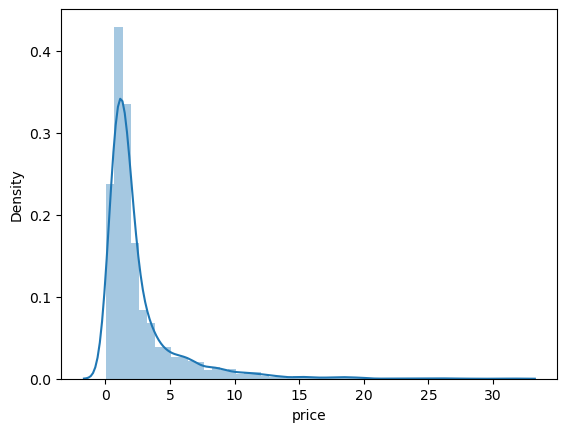

In [302]:
# outliers on the basis of price column
sns.distplot(df['price'])

<Axes: xlabel='price'>

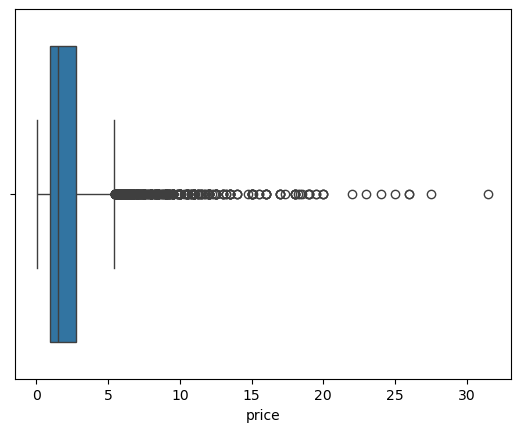

In [303]:
sns.boxplot(x=df['price'])

In [304]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [305]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2825,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,0,74
2771,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
3712,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,0,72
1676,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,138
3624,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,1,0
880,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,122
841,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,145
2802,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,1,54
2401,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,0,97
144,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,153


 on the basis of price col we can say that there are some genuine outliers but there are some data erros as well

# **Price_per_sq_ft**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\1086407749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sq_ft'])


<Axes: xlabel='price_per_sq_ft', ylabel='Density'>

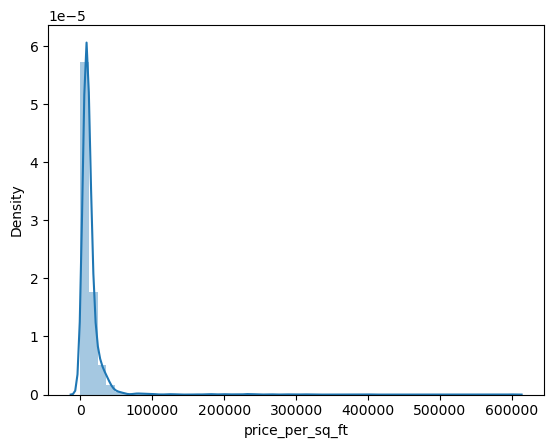

In [312]:
sns.distplot(df['price_per_sq_ft'])

<Axes: xlabel='price_per_sq_ft'>

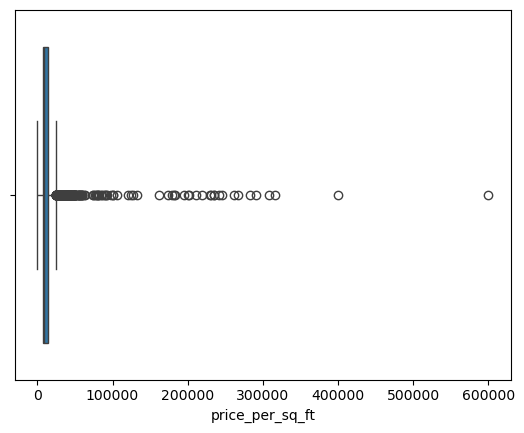

In [313]:
sns.boxplot(x=df['price_per_sq_ft'])

In [314]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sq_ft'].quantile(0.25)
Q3 = df['price_per_sq_ft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sq_ft'] < lower_bound) | (df['price_per_sq_ft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sq_ft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sq_ft, dtype: float64)

In [315]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [317]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [318]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.836158
std      12403.074329
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [320]:
df.update(outliers_sqft)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\1086407749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sq_ft'])


<Axes: xlabel='price_per_sq_ft', ylabel='Density'>

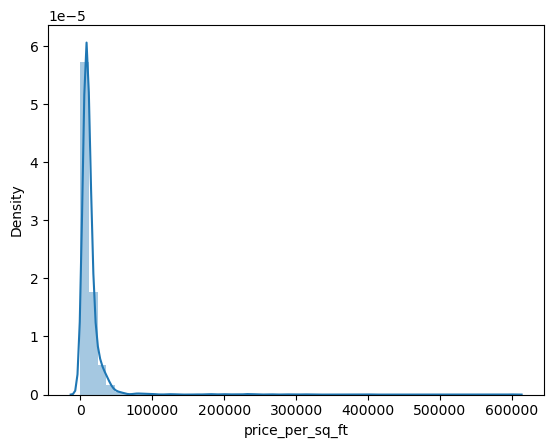

In [325]:
sns.distplot(df['price_per_sq_ft'])

<Axes: xlabel='price_per_sq_ft'>

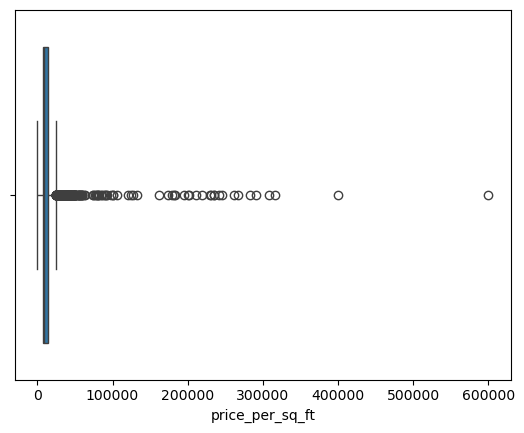

In [327]:
sns.boxplot(x=df['price_per_sq_ft'])

In [328]:
df[df['price_per_sq_ft']>50000]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
136,house,independent,sector 4,1.25,78125.0,1440.0,Built Up area: 160 (14.86 sq.m.),2,3,0,1.0,NaN,Undefined,NaN,160.0,NaN,0,0,0,0,0,1,0
225,house,huda plot sector 38,sector 38,4.30,245398.0,1575.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,5.0,North-West,Relatively New,NaN,145.0,NaN,0,0,0,0,0,0,7
269,house,uppal southend,sector 49,6.75,290948.0,2088.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,2,49
371,house,independent,sector 13,9.00,100000.0,8100.0,Plot area 900(83.61 sq.m.),10,5,3+,4.0,NaN,Old Property,NaN,900.0,NaN,0,0,0,0,0,1,0
430,house,independent,sector 38,8.00,230547.0,3123.0,Built Up area: 347 (32.24 sq.m.)Carpet area: 2...,10,10,3+,1.0,North,Undefined,NaN,347.0,215.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,house,independent,sector 55,1.45,241666.0,540.0,Plot area 60(5.57 sq.m.),4,4,3+,4.0,East,Relatively New,NaN,60.0,NaN,0,0,1,0,0,1,70
3632,house,independent,sector 17,3.50,218750.0,1440.0,Built Up area: 160 (14.86 sq.m.),6,6,3+,3.0,North-West,Undefined,NaN,160.0,NaN,0,0,0,0,0,1,0
3651,house,unitech deerwood chase,sector 50,8.45,235376.0,3231.0,Plot area 359(33.35 sq.m.),3,3,2,2.0,North-East,Old Property,NaN,359.0,NaN,1,1,0,0,0,2,102
3669,house,independent,sector 28,0.45,90000.0,450.0,Built Up area: 50 (4.65 sq.m.),5,3,0,1.0,NaN,Undefined,NaN,50.0,NaN,0,0,0,0,0,1,0


In [329]:
df = df[df['price_per_sq_ft'] <= 50000]

<Axes: xlabel='price_per_sq_ft'>

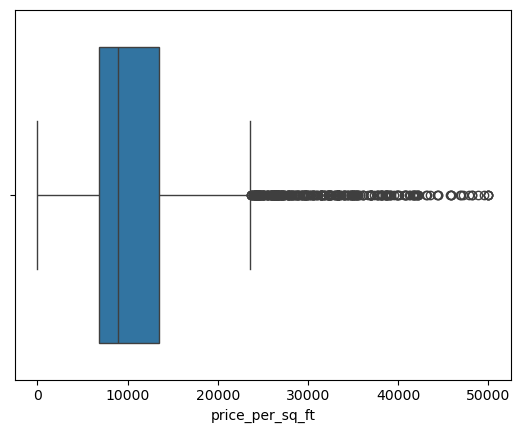

In [330]:
sns.boxplot(x=df['price_per_sq_ft'])

# **Area**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

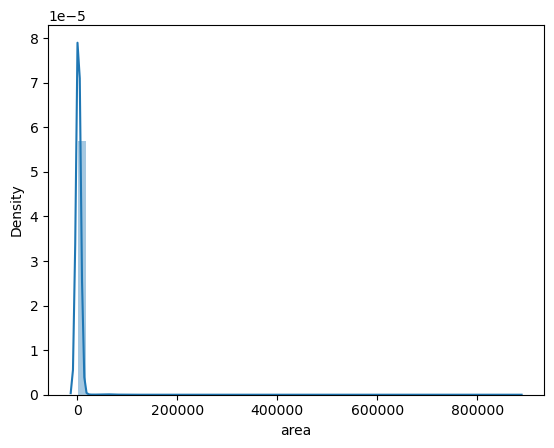

In [333]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

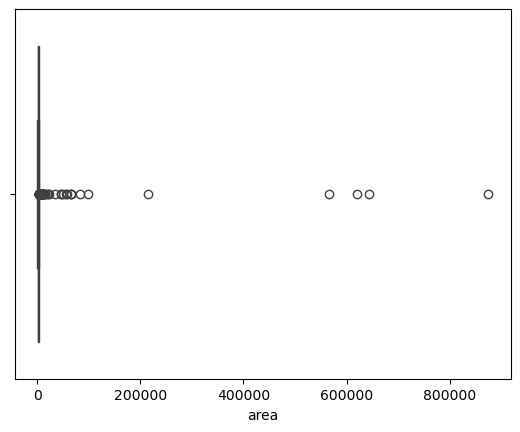

In [338]:
sns.boxplot(x=df['area'])

In [339]:
df['area'].describe()

count      3600.000000
mean       2958.461999
std       23358.226719
min         145.000000
25%        1264.795381
50%        1750.108732
75%        2342.996962
max      875000.000000
Name: area, dtype: float64

In [341]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
771,flat,signature global solera 2,sector 107,0.51,9.0,566666.666667,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,1,44
1367,flat,signature the roselia,sector 95,0.45,7.0,642857.142857,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,1,76
1395,house,independent,sector 50,5.00,232.0,215517.000000,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0
1686,flat,ramsons kshitij,sector 95,0.31,5.0,620000.000000,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,1,65
1993,flat,hcbs sports ville,sohna road,0.35,4.0,875000.000000,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,0,44


In [342]:
df = df[df['area'] < 100000]

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

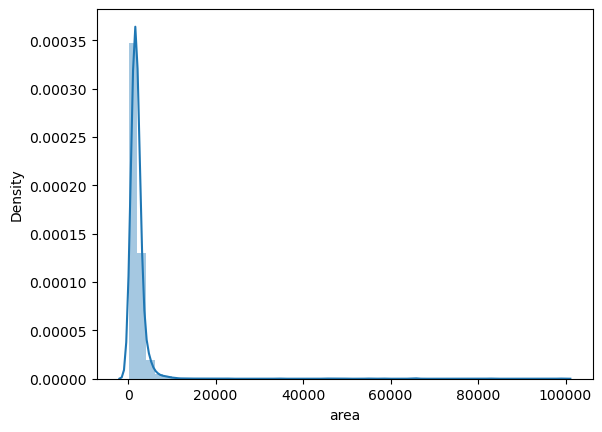

In [343]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

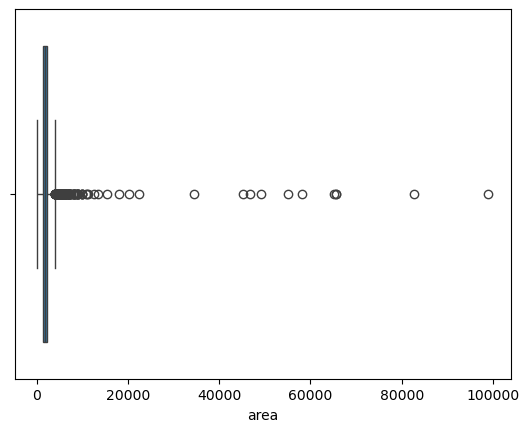

In [348]:
sns.boxplot(x=df['area'])

In [349]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 3425, 2939, 3509, 2255, 3666, 3659, 1689, 2930

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
694,house,independent,sector 26,18.40,1859.0,98978.000000,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
1360,house,ganpati heights apartment,sector 13,1.25,151.0,82781.000000,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,1,7
3425,flat,rof ananda,sector 95,0.38,58.0,65517.241379,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,1,15
2939,flat,rof ananda,sector 95,0.38,58.0,65517.241379,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,1,51
1433,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.000000,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
3509,flat,pyramid elite,sector 86,0.46,79.0,58227.848101,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,1,15
2255,flat,rof ananda,sector 95,0.33,60.0,55000.000000,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,1,37
3666,flat,signature the serenas,sohna road,0.28,57.0,49122.807018,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,1,37
3282,house,independent,sector 25,7.30,1560.0,46795.000000,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
3659,flat,ramsons kshitij,sector 95,0.24,53.0,45283.018868,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,1,33


In [351]:
df.drop(index=[425, 2939, 1360, 3425, 3509, 2255, 3666, 3659, 1689, 2930], inplace=True)

In [353]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
694,house,independent,sector 26,18.40,1859.0,98978.000000,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,2,60
1433,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.000000,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,1,0
3282,house,independent,sector 25,7.30,1560.0,46795.000000,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,2,109
1300,house,independent,sector 57,6.25,2778.0,22498.000000,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,2,61
1862,house,independent,sector 43,5.50,2716.0,20250.000000,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,2,123
1246,flat,godrej air,sector 85,2.50,1379.0,18129.079043,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.00,1,0,0,1,1,2,44
2850,house,unitech aspen greens,sector 50,6.95,4490.0,15479.000000,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,1,160
3609,flat,godrej icon,sector 88a,1.75,1384.0,12644.508671,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,1,55
2771,house,independent,sector 43,27.50,24366.0,11286.000000,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
73,flat,m3m golfestate,sector 65,13.20,12000.0,11000.000000,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,1,60


In [357]:
df.loc[694,'area'] = 11000.00
df.loc[1360,'area'] = 115.0*9
df.loc[1433,'area'] = 7250.00
df.loc[3282,'area'] = 5800.0
df.loc[1300,'area'] = 2660.0	
df.loc[1433,'area'] = 7250.00
df.loc[1862,'area'] = 2850.0
df.loc[2850,'area'] = 2160.0
df.loc[3609,'area'] = 1175.11
df.loc[264,'area'] = 3500.0

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

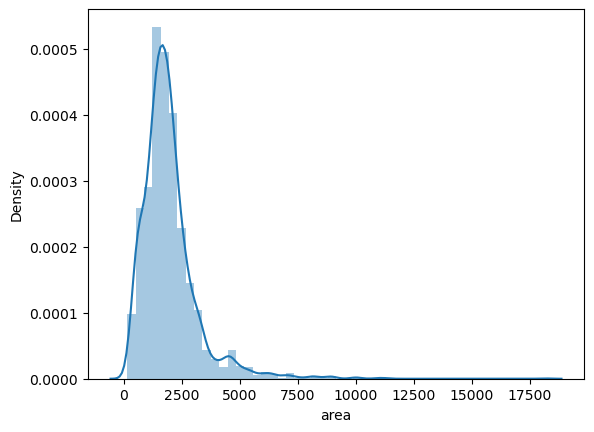

In [359]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

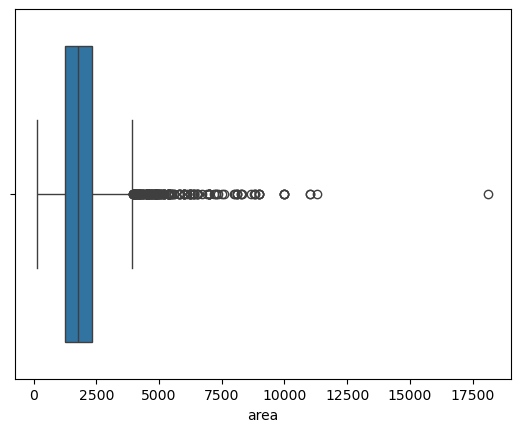

In [361]:
sns.boxplot(x=df['area'])

In [363]:
df['area'].describe()

count     3586.000000
mean      1952.767585
std       1237.972491
min        145.000000
25%       1262.064187
50%       1750.000000
75%       2323.980269
max      18129.079043
Name: area, dtype: float64

# **Bedroom**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

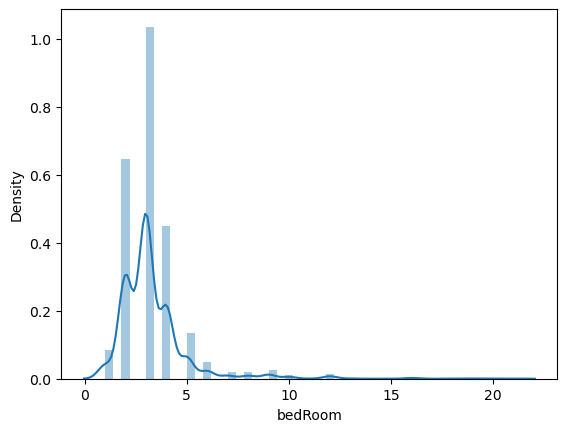

In [366]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

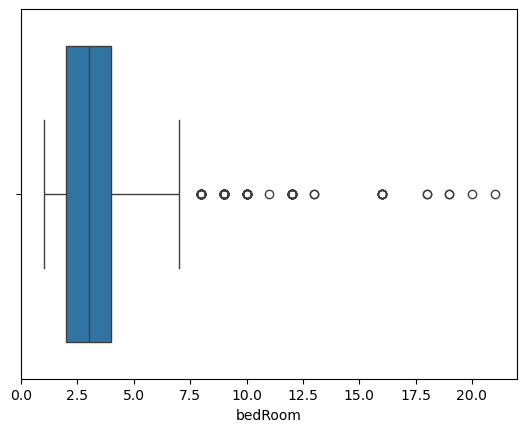

In [368]:
sns.boxplot(x=df['bedRoom'])

In [370]:
df['bedRoom'].describe()

count    3585.000000
mean        3.298187
std         1.768890
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [372]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1174,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,49.0
1778,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20.0,20.0,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,22.0
1503,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19.0,17.0,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,74.0
3365,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19.0,17.0,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1.0,0.0,1.0,0.0,0.0,1.0,68.0
3187,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18.0,18.0,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,57.0
2076,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18.0,18.0,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,70.0
3681,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16.0,18.0,3+,4.0,North-East,New Property,NaN,2700.0,NaN,0.0,1.0,0.0,1.0,0.0,2.0,49.0
3341,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,0.0
3195,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16.0,16.0,3+,4.0,North-West,Relatively New,NaN,2700.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,41.0
2178,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16.0,16.0,3+,4.0,NaN,New Property,NaN,500.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,31.0


In [374]:
df = df[df['bedRoom'] <= 10]

In [376]:
df.shape

(3547, 23)

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\1691983684.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

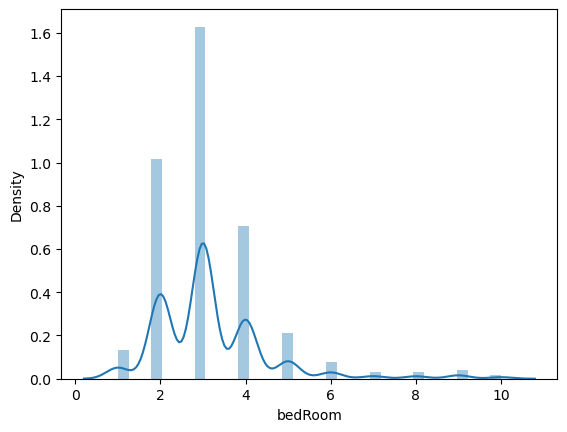

In [378]:
sns.distplot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

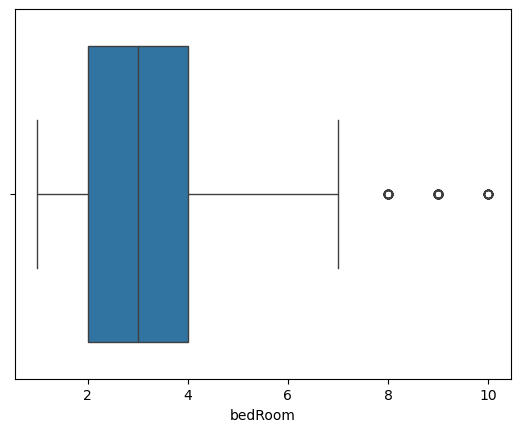

In [380]:
sns.boxplot(x=df['bedRoom'])

In [382]:
df['bedRoom'].describe()

count    3547.000000
mean        3.184663
std         1.365108
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

# **Bathroom**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

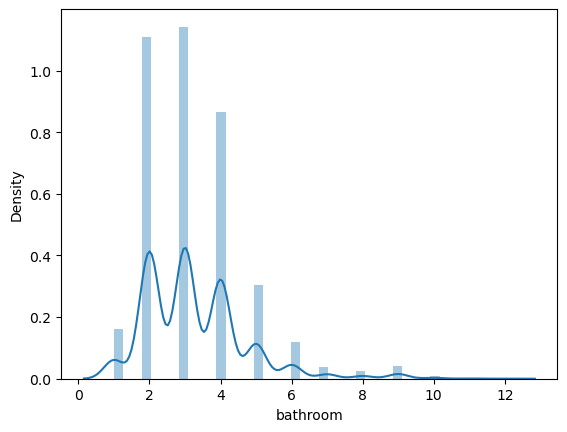

In [385]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

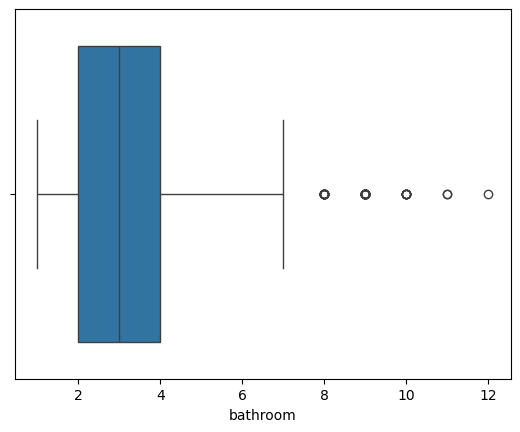

In [387]:
sns.boxplot(x=df['bathroom'])

In [389]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1189,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9.0,12.0,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0.0,1.0,0.0,0.0,0.0,2.0,146.0
636,house,independent,sector 24,11.00,28898.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8.0,11.0,3+,3.0,East,Old Property,NaN,5000.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,39.0
1709,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10.0,11.0,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,38.0


In [391]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet a...,3.0,5.0,2,15.0,North,New Property,2343.0,NaN,1512.05,0.0,1.0,0.0,0.0,0.0,1.0,118.0
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5.0,6.0,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,84.0
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4.0,5.0,2,2.0,East,Old Property,NaN,4950.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,paras dews,sector 106,1.35,8940.0,1510.067114,Carpet area: 1510 (140.28 sq.m.),4.0,3.0,3,19.0,NaN,Old Property,NaN,NaN,1510.00,0.0,1.0,0.0,0.0,0.0,1.0,112.0
4,flat,corona optus,sector 37c,1.22,6912.0,1765.046296,Super Built up area 1765(163.97 sq.m.)Built Up...,3.0,4.0,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.00,0.0,0.0,0.0,0.0,0.0,1.0,149.0


# **super built up area**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

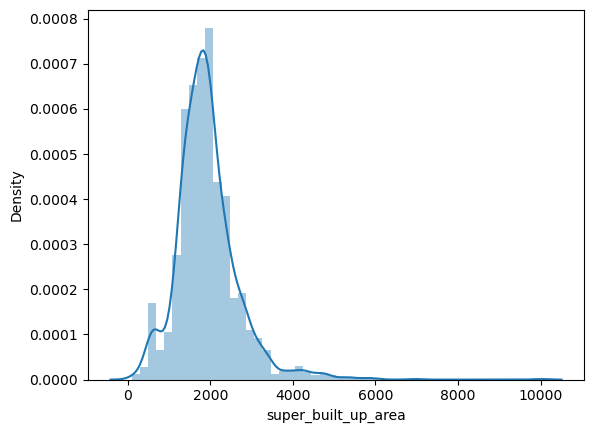

In [394]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

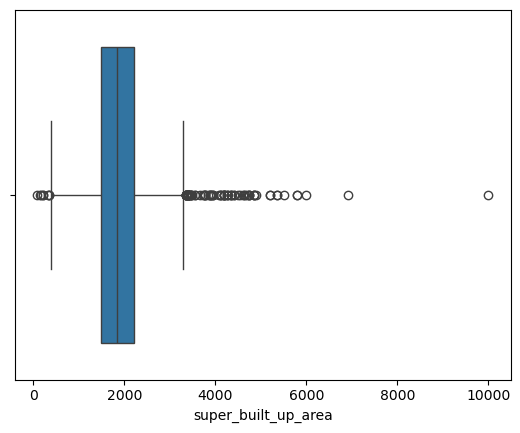

In [396]:
sns.boxplot(x=df['super_built_up_area'])

In [398]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.040293
std        763.901911
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [400]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
982,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.024167,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,2.0,140.0
1497,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.000000,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,49.0


# **built up area**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

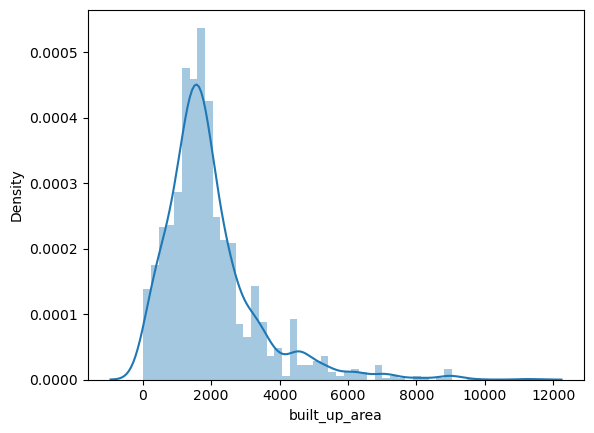

In [403]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

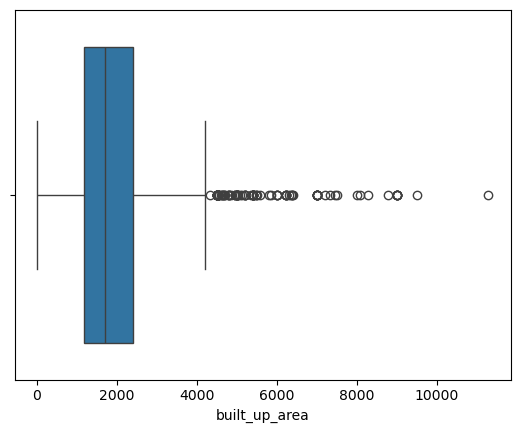

In [405]:
sns.boxplot(x=df['built_up_area'])

In [407]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2771,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6.0,7.0,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,42.0


# **carpet area**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

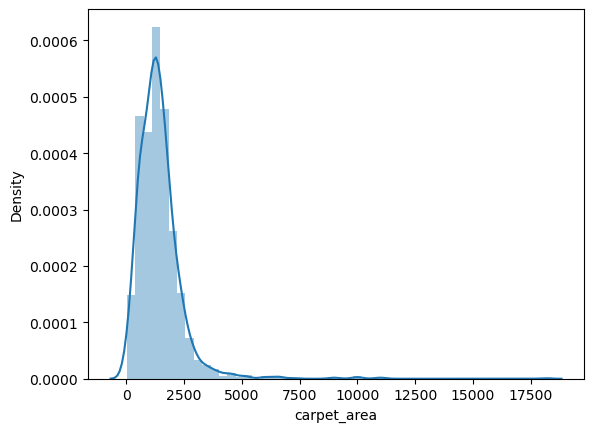

In [410]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

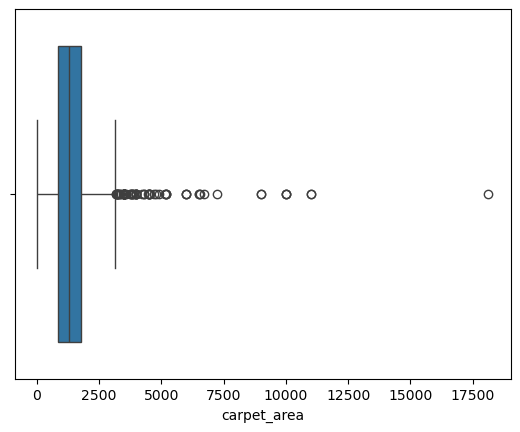

In [412]:
sns.boxplot(x=df['carpet_area'])

In [414]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
73,flat,m3m golfestate,sector 65,13.2,12000.0,11000.000000,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0.0,1.0,0.0,0.0,0.0,1.0,60.0
694,house,independent,sector 26,18.4,1859.0,11000.000000,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6.0,8.0,3+,4.0,South,Relatively New,NaN,NaN,11000.0,0.0,1.0,1.0,1.0,0.0,2.0,60.0
1246,flat,godrej air,sector 85,2.5,1379.0,18129.079043,Carpet area: 18122 (1683.59 sq.m.),4.0,5.0,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,1.0,0.0,0.0,1.0,1.0,2.0,44.0


In [416]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet a...,3.0,5.0,2,15.0,North,New Property,2343.0,NaN,1512.05,0.0,1.0,0.0,0.0,0.0,1.0,118.0
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5.0,6.0,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,84.0
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4.0,5.0,2,2.0,East,Old Property,NaN,4950.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,paras dews,sector 106,1.35,8940.0,1510.067114,Carpet area: 1510 (140.28 sq.m.),4.0,3.0,3,19.0,NaN,Old Property,NaN,NaN,1510.00,0.0,1.0,0.0,0.0,0.0,1.0,112.0
4,flat,corona optus,sector 37c,1.22,6912.0,1765.046296,Super Built up area 1765(163.97 sq.m.)Built Up...,3.0,4.0,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.00,0.0,0.0,0.0,0.0,0.0,1.0,149.0


# **luxury_score**

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

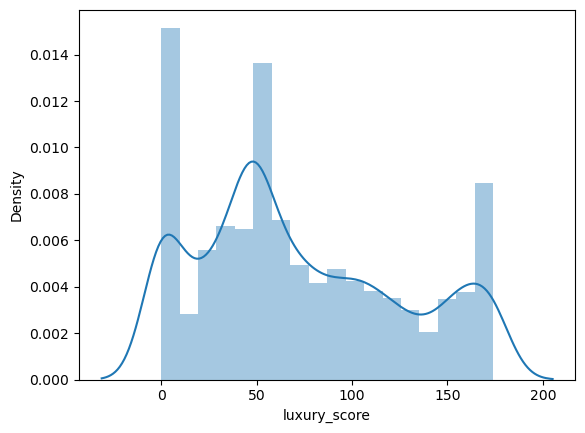

In [420]:
sns.distplot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

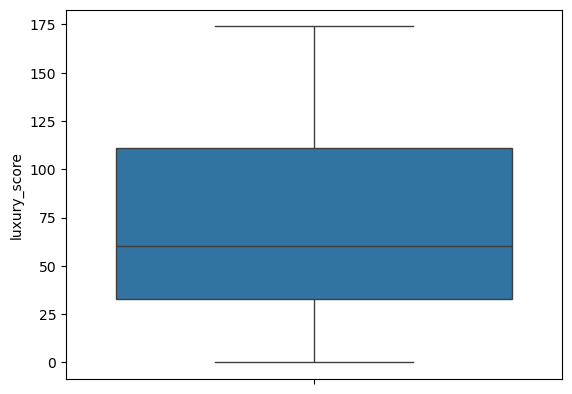

In [422]:
sns.boxplot(df['luxury_score'])

In [424]:
df.shape

(3547, 23)

In [426]:
df['price_per_sq_ft'] = round((df['price']*10000000)/df['area'])

In [428]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet a...,3.0,5.0,2,15.0,North,New Property,2343.0,NaN,1512.05,0.0,1.0,0.0,0.0,0.0,1.0,118.0
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5.0,6.0,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,84.0
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4.0,5.0,2,2.0,East,Old Property,NaN,4950.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,flat,paras dews,sector 106,1.35,8940.0,1510.067114,Carpet area: 1510 (140.28 sq.m.),4.0,3.0,3,19.0,NaN,Old Property,NaN,NaN,1510.00,0.0,1.0,0.0,0.0,0.0,1.0,112.0
4,flat,corona optus,sector 37c,1.22,6912.0,1765.046296,Super Built up area 1765(163.97 sq.m.)Built Up...,3.0,4.0,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.00,0.0,0.0,0.0,0.0,0.0,1.0,149.0


C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\1086407749.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sq_ft'])


<Axes: xlabel='price_per_sq_ft', ylabel='Density'>

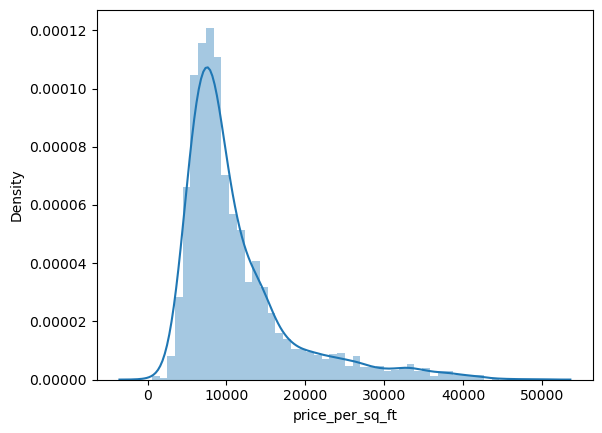

In [430]:
sns.distplot(df['price_per_sq_ft'])

<Axes: ylabel='price_per_sq_ft'>

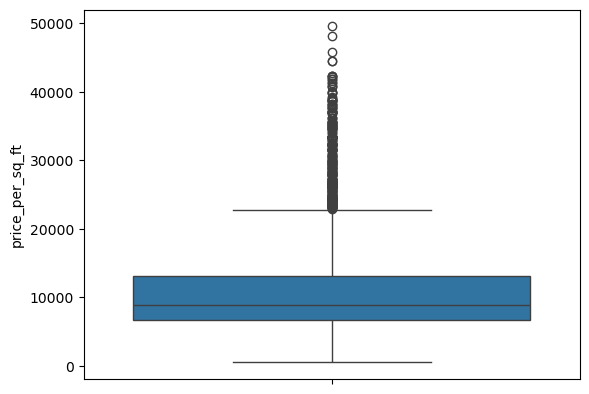

In [434]:
sns.boxplot(df['price_per_sq_ft'])

In [436]:
df[df['price_per_sq_ft'] > 42000]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
240,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9.0,9.0,3+,5.0,East,New Property,NaN,115.0,100.0,0.0,0.0,0.0,0.0,1.0,2.0,44.0
1774,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6.0,6.0,3,2.0,East,Relatively New,NaN,4518.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,121.0
1811,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6.0,8.0,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2253,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5.0,5.0,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0.0,1.0,0.0,1.0,0.0,2.0,88.0
2401,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0.0,1.0,0.0,1.0,0.0,0.0,97.0
2828,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2.0,2.0,2,3.0,North,Undefined,NaN,2000.0,1800.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3268,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3.0,3.0,3+,4.0,North,New Property,NaN,2700.0,NaN,0.0,0.0,0.0,1.0,0.0,2.0,7.0
3555,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4.0,5.0,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0.0,1.0,1.0,1.0,0.0,2.0,60.0
3706,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6.0,8.0,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1.0,1.0,1.0,1.0,0.0,2.0,103.0


In [440]:
x = df[df['price_per_sq_ft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

198.2

In [442]:
df[(df['area']/df['bedRoom'])<198]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
76,house,independent,sector 4,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6.0,4.0,1,2.0,North,Undefined,NaN,990.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
104,house,independent,sector 11,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.),7.0,4.0,3+,4.0,NaN,Moderately Old,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,7.0
120,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3.0,2.0,1,1.0,NaN,Undefined,NaN,NaN,535.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
129,house,independent,sohna road road,0.95,8920.0,1065.0,Plot area 1065(98.94 sq.m.),10.0,10.0,3+,3.0,NaN,New Property,NaN,1065.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3524,house,independent,sector 17,0.32,22069.0,145.0,Built Up area: 145 (13.47 sq.m.),2.0,2.0,0,3.0,NaN,Undefined,NaN,145.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3634,house,surendra homes dayaindependentd colony,sector 6,0.75,15625.0,480.0,Built Up area: 480 (44.59 sq.m.),4.0,4.0,2,1.0,NaN,Undefined,NaN,480.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3662,house,independent,sector 21,0.60,6173.0,972.0,Plot area 108(90.3 sq.m.),8.0,3.0,2,3.0,NaN,Old Property,NaN,972.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3675,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),10.0,9.0,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1.0,1.0,0.0,0.0,0.0,2.0,36.0


In [446]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [450]:
(df[df['area_room_ratio'] < 250])['bedRoom'].value_counts()

bedRoom
2.0     47
3.0     31
5.0     24
6.0     16
4.0     15
9.0     13
8.0     11
7.0      8
10.0     7
Name: count, dtype: int64

In [452]:
df = df[df['area_room_ratio']>100]

In [454]:
outliers_df = df[(df['area_room_ratio']<250)&(df['bedRoom']>3)]

In [456]:
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\3450078040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [458]:
df.update(outliers_df)

In [460]:
df['area_room_ratio'] = df['area']/df['bedRoom']

C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_22664\465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [464]:
df[(df['area_room_ratio']<250)&(df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
97,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4.0,3,1.0,South,Undefined,NaN,NaN,120.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,120.000000
147,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,2.0,0.0,225.000000
336,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6.0,2.0,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,166.666667
570,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10.0,1.0,0,1.0,NaN,New Property,NaN,2250.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,225.000000
672,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1.0,0,1.0,NaN,Undefined,NaN,565.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,113.000000
948,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5.0,4.0,2,1.0,North-East,Undefined,NaN,NaN,110.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,198.000000
978,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5.0,4.0,2,1.0,East,Undefined,NaN,1100.0,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,220.000000
1662,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6.0,4.0,1,1.0,South-West,Undefined,NaN,NaN,900.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
2017,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8.0,8.0,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,150.000000
2574,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8.0,0,1.0,NaN,New Property,NaN,1782.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,222.750000


In [466]:
df = df[~((df['area_room_ratio']<250)&(df['bedRoom']>4))]

In [468]:
df.shape

(3519, 24)

In [470]:
df.head()

,property_type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,sobha city,sector 108,3.95,16858.0,2343.101198,Super Built up area 2343(217.67 sq.m.)Carpet a...,3.0,5.0,2,15.0,North,New Property,2343.0,NaN,1512.05,0.0,1.0,0.0,0.0,0.0,1.0,118.0,781.033733
1,house,unitech uniworld resorts,sector 33,11.50,24573.0,4680.000000,Plot area 520(434.79 sq.m.),5.0,6.0,3+,4.0,East,Relatively New,NaN,4680.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,84.0,936.000000
2,house,independent,sector 13,4.50,9091.0,4950.000000,Plot area 550(459.87 sq.m.),4.0,5.0,2,2.0,East,Old Property,NaN,4950.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1237.500000
3,flat,paras dews,sector 106,1.35,8940.0,1510.067114,Carpet area: 1510 (140.28 sq.m.),4.0,3.0,3,19.0,NaN,Old Property,NaN,NaN,1510.00,0.0,1.0,0.0,0.0,0.0,1.0,112.0,377.516779
4,flat,corona optus,sector 37c,1.22,6912.0,1765.046296,Super Built up area 1765(163.97 sq.m.)Built Up...,3.0,4.0,3,5.0,South-East,Relatively New,1765.0,1665.0,1565.00,0.0,0.0,0.0,0.0,0.0,1.0,149.0,588.348765


In [472]:
df.to_csv('../processed_data/gurgaon_properties_outlier_treated.csv',index = False)